## Week 6. Practice Session I

For the past two months, we have been trying to release python code on small problems and exercises. At the last seminars of this course, we invite you to expand the scope of your skills.

On this week, we're going to try to understand on your own one of the most important problems of political technology - **political leaning prediction**. Data was taken from [Kaggle platform](https://www.kaggle.com/datasets/yemregundogmus/turkey-political-opinions?select=data.csv) and it's dedicated to **Turkey Political Opinions** - with Age, Sex, Education, City Features.

### Why we're doing this?

* In case of **academic research**: for some political science topics, the combination of practical code and data skills and a theoretical background in problem political science is just as important as each of these skills separately. We call it 'applying computational thinking' - and you don't need to be mathematician here :) The biggest topic is probably a [Computational Social Science](https://en.wikipedia.org/wiki/Computational_social_science) and [Computational Politics](https://en.wikipedia.org/wiki/Computational_politics). These skill can also serve as a launching pad for further development in the areas of modelling social problems, its simulations and quantitative analysis. (Popov, 2023)  

* About **money**: 
    * [Policy Analyst](https://www.indeed.com/career/policy-analyst/salaries) positions in the USA  
    * Another one [Political Data Science Jobs] site in the USA(https://www.ziprecruiter.com/Jobs/Political-Data-Science)

### Background

Before starting analytical work (working with code), it is always important to know the background of the current problem:
1. examining sources will help you understand the global context of the phenomena at hand;  
2. assists in formulating a research question and formulating hypotheses;  
3. Gives the opportunity to explore the limitations and gaps in the subject area (including trends, common used approaches) - critical thinking

* General info about politics of Turkey: [wiki](https://en.wikipedia.org/wiki/Politics_of_Turkey#:~:text=Turkey's%20political%20system%20is%20based,in%20the%20Grand%20National%20Assembly.) - good as a starting point
* Human Rights Watch 2022 [annual report](https://www.hrw.org/world-report/2022/country-chapters/turkey) about Turkey  
* Recent news from valid publishers, e.g. [Financial Times](https://www.ft.com/turkish-politics)

<u><font color='Pink'>***Your turn:***</font></u>  What other valid sources of information for an introduction to the subject area of the problem can you suggest? 

* academic articles and conferences (if the question is specific, the most recent years);  
* about news: assess the validity of resources in the topic in which the problem is being studied (also with large statoprices and data) - avoid biased or censored sources (if possible);  
* WorldValueSurvey, CorruptionIndex and other databases.  

### Data First Look

In [16]:
import pandas as pd 
# turkey_political_opinions = pd.read_csv("../data/turkey_political_opinions.csv")
# len(turkey_political_opinions)

168

In [4]:
### data prep
# shuffle_df = turkey_political_opinions.sample(frac=1)
# train_size = int(0.8 * len(turkey_political_opinions))
# df = shuffle_df[:train_size]
# newcomers = shuffle_df[train_size:] # test sample

# df.to_csv('turkey_political_opinions_train.csv', index=False)
# newcomers.to_csv('turkey_political_opinions_test.csv', index=False)

df = pd.read_csv("../data/turkey_political_opinions_train.csv")

### test data
# newcomers = pd.read_csv("turkey_political_opinions_test.csv")
# parties = newcomers['parti'] # y's of test
# newcomers = newcomers.drop(columns="parti")

# train sample
df.head(10)

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
111,5/11/2018 23:53:20,Erkek,18-30,Ege,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Evet,Evet,Evet,DIĞER
87,5/11/2018 13:41:41,Erkek,18-30,Marmara,Lisans Üstü,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,CHP
93,5/11/2018 15:47:21,Erkek,30-50,Ege,Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Evet,AKP
28,5/11/2018 2:15:40,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
2,5/11/2018 1:28:26,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
37,5/11/2018 5:00:52,Erkek,30-50,Karadeniz,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
140,5/12/2018 14:41:10,Erkek,18-30,Marmara,Lise,Hayır,Evet,Evet,Evet,Hayır,Evet,Hayır,Hayır,Hayır,Evet,IYI PARTI
79,5/11/2018 12:24:12,Kadın,60+,Güneydoğu,İlkokul,Evet,Hayır,Hayır,Evet,Evet,Evet,Hayır,Evet,Hayır,Hayır,AKP
3,5/11/2018 1:30:18,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
141,5/12/2018 14:45:18,Erkek,30-50,Ege,Lise,Evet,Evet,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,HDP


In this dataset, 10 questions related to this political orientation were asked, and a yes / no feedback was received from them. Apart from that, the gender of the person, age, level of education, region where he lived was added to the questions.

The task of our current seminar will be to **determine the political preferences of voter**s, based on their demographic data and the results of a sociological survey. 

<u><font color='Pink'>***Your turn***</font></u> 

We have data to analyse, but it is not seem to be prepared yet. Propose your steps how to reconstruct the dataframe for future analysis.

***Answer***
1. Rename columns
2. Rename values in column
3. Decrease dimensionality of the data

### Data Preprocessing 

In [6]:
df1 = df.copy()
df1.head(10)

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
111,5/11/2018 23:53:20,Erkek,18-30,Ege,Lisans,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Evet,Evet,Evet,DIĞER
87,5/11/2018 13:41:41,Erkek,18-30,Marmara,Lisans Üstü,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,CHP
93,5/11/2018 15:47:21,Erkek,30-50,Ege,Lisans,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Evet,AKP
28,5/11/2018 2:15:40,Erkek,18-30,Marmara,Ön Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
2,5/11/2018 1:28:26,Kadın,18-30,Marmara,Lisans,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER
37,5/11/2018 5:00:52,Erkek,30-50,Karadeniz,Lisans,Evet,Evet,Hayır,Evet,Hayır,Evet,Hayır,Evet,Hayır,Hayır,AKP
140,5/12/2018 14:41:10,Erkek,18-30,Marmara,Lise,Hayır,Evet,Evet,Evet,Hayır,Evet,Hayır,Hayır,Hayır,Evet,IYI PARTI
79,5/11/2018 12:24:12,Kadın,60+,Güneydoğu,İlkokul,Evet,Hayır,Hayır,Evet,Evet,Evet,Hayır,Evet,Hayır,Hayır,AKP
3,5/11/2018 1:30:18,Erkek,0-18,Marmara,Lise,Evet,Evet,Hayır,Evet,Hayır,Evet,Evet,Evet,Evet,Evet,IYI PARTI
141,5/12/2018 14:45:18,Erkek,30-50,Ege,Lise,Evet,Evet,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,HDP


#### To translate values 

`.replace()` method could be useful for these tasks ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html))

***Data Review:***

* Evet = Yes
* Hayır = No
* Erkek = Male
* Kadın = Female
* İlkokul = primary school
* OrtaOkul = junior high school
* Lise = High School
* Lisans = University
* Lisans Üstü = MA

<u><font color='Pink'>***Your turn:***</font></u> 

Suggest how we can replace a particular value in some column to brand new one.

In [7]:
# var 1 - creating new column + dropping one
pd.Series(['Male' if val == 'Erkek' else 'Female' for val in df1['Cinsiyet']])

# var 2 - manual replace one by one
df1['Cinsiyet'] = df1['Cinsiyet'].replace('Erkek', 'Male').replace('Kadın', 'Female')

# var 3 - altogether with dict
df1 = df1.replace({
    'Egitim': {
        'Lise': 'High School',
        'Lisans': 'University',
        'Ön Lisans': 'Specialist',
        'Lisans Üstü': 'Master',
        'İlkokul': 'Primary School',
        'Ortaokul': 'Junior High School',
    }
})

df1.head()

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
111,5/11/2018 23:53:20,Male,18-30,Ege,University,Hayır,Evet,Evet,Hayır,Hayır,Hayır,Evet,Evet,Evet,Evet,DIĞER
87,5/11/2018 13:41:41,Male,18-30,Marmara,Master,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Hayır,Evet,Evet,CHP
93,5/11/2018 15:47:21,Male,30-50,Ege,University,Hayır,Evet,Evet,Evet,Hayır,Hayır,Evet,Evet,Hayır,Evet,AKP
28,5/11/2018 2:15:40,Male,18-30,Marmara,Specialist,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,IYI PARTI
2,5/11/2018 1:28:26,Female,18-30,Marmara,University,Hayır,Evet,Hayır,Hayır,Hayır,Hayır,Evet,Hayır,Evet,Evet,DIĞER


In [8]:
# var 1 + var 3 allows to type less ;) for cases with repeated values over columns
yes_no = {"Hayır": "No", "Evet": "Yes"}
df1 = df1.replace({col: yes_no for col in df1.columns[5:-1]})
df1.head()

,Timestamp,Cinsiyet,Yas,Bolge,Egitim,soru1,soru2,soru3,soru4,soru5,soru6,soru7,soru8,soru9,soru10,parti
111,5/11/2018 23:53:20,Male,18-30,Ege,University,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,DIĞER
87,5/11/2018 13:41:41,Male,18-30,Marmara,Master,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,CHP
93,5/11/2018 15:47:21,Male,30-50,Ege,University,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,AKP
28,5/11/2018 2:15:40,Male,18-30,Marmara,Specialist,No,Yes,No,No,No,No,Yes,No,Yes,Yes,IYI PARTI
2,5/11/2018 1:28:26,Female,18-30,Marmara,University,No,Yes,No,No,No,No,Yes,No,Yes,Yes,DIĞER


#### Rename features

Now we moving to columns rename part. Here's the list of columns'translations and descriptions from author's dataset review: 

* Cinsiyet : Sex Feature
* Yas : Age Feature
* Bolge : Areas inhabited in Turkey (Municipality)
* Egitim : Education Level
* (Soru = Question) (Questions include Turkey)
    * Soru1/Question1: Do you think our Economic Status is good?
    * Soru2/Question2: Need Reform in Education?
    * Soru3/Question3: Resolve Privatization Are You?
    * Soru4/Question4: Should the state use a penalty like death penalty for certain crimes?
    * Soru5/Question5: Do you find our journalists neutral enough?
    * Soru6/Question6: From 22:00 am Then Are You Supporting the Prohibition to Buy Drinks?
    * Soru7/Question7: Do You Want to Live in a Secular State?
    * Soru8/Question8: Are you supporting the abortion ban?
    * Soru9/Question9: Do you think that the extraordinary state (Ohal) restricts Freedoms?
    * Soru10/Question10: Would you like a new part of the parliament to enter?
* Parti : Political View

<u><font color='Pink'>***Your turn:***</font></u> 

Suggest how we can rename columns in our dataframe.

In [9]:
# ver 1: create-delete features
df1['Party'] = df1['parti']
df1 = df1.drop(columns = "parti")

# ver2: manual input
df1 = df1.rename(
    columns = {
        'Cinsiyet': 'Sex', 
        'Yas': 'Age',
        'Bolge': 'Municipality', 
        'Egitim': 'Education',
        }
    )

# ver3: dict comprehension
questions = ['Econ_stat_good', 'Edu_reform', 'Privatisation', 'Death_penalty', 'Neut_journ', 'Alc_past_22_prohib', 'Secular_state', 'Abortion_ban', 'Ohal_freedom', 'New_parties']
df1 = df1.rename(
    columns = {df1.columns[5:-1][i]: questions[i] for i in range(len(df1.columns[5:-1]))}
    )

df1.head()

,Timestamp,Sex,Age,Municipality,Education,Econ_stat_good,Edu_reform,Privatisation,Death_penalty,Neut_journ,Alc_past_22_prohib,Secular_state,Abortion_ban,Ohal_freedom,New_parties,Party
111,5/11/2018 23:53:20,Male,18-30,Ege,University,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,DIĞER
87,5/11/2018 13:41:41,Male,18-30,Marmara,Master,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,CHP
93,5/11/2018 15:47:21,Male,30-50,Ege,University,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,AKP
28,5/11/2018 2:15:40,Male,18-30,Marmara,Specialist,No,Yes,No,No,No,No,Yes,No,Yes,Yes,IYI PARTI
2,5/11/2018 1:28:26,Female,18-30,Marmara,University,No,Yes,No,No,No,No,Yes,No,Yes,Yes,DIĞER


Dimension reduction

For short datasets, making assumptions on multivalent classes is not efficient. 

<u><font color='Pink'>***Your turn:***</font></u> 

1. Determine number of observations and number of parties `представленных` in the survey. What is the average number of voters per party? `сделайте выводы`.
2. Create a new column of political orientation profile for each participant of the survey (make it `Right` and `Left`, or suggest your option). You can base new distribution on Turkish political parties' [wiki page](https://en.wikipedia.org/wiki/List_of_political_parties_in_Turkey):  

    * AKP - Justice and Development Party (`правящая партия`) - National conservatism, Social conservatism - Right-wing to far-right
    * CHP - Republican People's Party - Social democracy - Centre-left
    * DIĞER - others
    * HDP - Peoples' Democratic Party - Kurdish nationalism Democratic socialism (minority rights) - Centre-left to left-wing
    * IYI PARTI - Good Party - Turkish nationalism, National conservatism - Centre to right-wing
    * MHP - Nationalist Movement Party - Turkish ultranationalism, Neo-fascism - Right-wing to far-right

In [20]:
print("Average number of voters per party:", round(len(df1)/len(df1['Party'].unique()), 2))
# {par: list(turkey_political_opinions['parti']).count(par) for par in turkey_political_opinions['parti']}

Average number of voters per party: 22.33


In [98]:
df1['Profile'] = ["Left" if party in ('CHP', 'HDP') else "Right" for party in df1['Party']]
df1.head()

,Timestamp,Sex,Age,Municipality,Education,Econ_stat_good,Edu_reform,Privatisation,Death_penalty,Neut_journ,Alc_past_22_prohib,Secular_state,Abortion_ban,Ohal_freedom,New_parties,Party,Profile
111,5/11/2018 23:53:20,Male,18-30,Ege,University,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,DIĞER,Right
87,5/11/2018 13:41:41,Male,18-30,Marmara,Master,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,CHP,Left
93,5/11/2018 15:47:21,Male,30-50,Ege,University,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,AKP,Right
28,5/11/2018 2:15:40,Male,18-30,Marmara,Specialist,No,Yes,No,No,No,No,Yes,No,Yes,Yes,IYI PARTI,Right
2,5/11/2018 1:28:26,Female,18-30,Marmara,University,No,Yes,No,No,No,No,Yes,No,Yes,Yes,DIĞER,Right


Now we're all set and ready to start analysis.

In [22]:
df = df1

### Exploratory Data Analysis

from [Towards Data Science](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15): Imagine your wolf pack decides to watch a movie you haven’t heard of. There is absolutely no debate about that, it will lead to a state where you find yourself puzzled with lot of questions which needs to be answered in order to make a decision. Being a good chieftain the first question you would ask, what is the cast and crew of the movie? As a regular practice, you would also watch the trailer of the movie on YouTube. Furthermore, you’d find out ratings and reviews the movie has received from the audience.

Whatever investigating measures you would take before finally buying popcorn for your clan in theater, is nothing but what data scientists in their lingo call **Exploratory Data Analysis**. EDA refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<u><font color='Pink'>***Your turn:***</font></u> EDA always starts with the first glance to your data, and we already know how to do this. How?



In [23]:
df.head()

,Timestamp,Sex,Age,Municipality,Education,Econ_stat_good,Edu_reform,Privatisation,Death_penalty,Neut_journ,Alc_past_22_prohib,Secular_state,Abortion_ban,Ohal_freedom,New_parties,Party,Profile
111,5/11/2018 23:53:20,Male,18-30,Ege,University,No,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,DIĞER,Right
87,5/11/2018 13:41:41,Male,18-30,Marmara,Master,No,Yes,Yes,Yes,No,No,Yes,No,Yes,Yes,CHP,Left
93,5/11/2018 15:47:21,Male,30-50,Ege,University,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,AKP,Right
28,5/11/2018 2:15:40,Male,18-30,Marmara,Specialist,No,Yes,No,No,No,No,Yes,No,Yes,Yes,IYI PARTI,Right
2,5/11/2018 1:28:26,Female,18-30,Marmara,University,No,Yes,No,No,No,No,Yes,No,Yes,Yes,DIĞER,Right


For purposes of EDA and to better know your data, it could be useful to know the metadata - data about your data.

In [15]:
# descriptive statistics
df.shape

(134, 16)

In [12]:
# descriptive statistics
df.describe()

,Timestamp,Sex,Age,Municipality,Education,Econ_stat_good,Edu_reform,Privatisation,Death_penalty,Neut_journ,Alc_past_22_prohib,Secular_state,Abortion_ban,Ohal_freedom,New_parties,Party
count,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134,134
unique,134,2,4,7,6,2,2,2,2,2,2,2,2,2,2,6
top,5/11/2018 23:53:20,Male,18-30,Marmara,University,No,Yes,No,Yes,No,No,Yes,No,Yes,Yes,IYI PARTI
freq,1,110,83,76,63,81,128,70,72,128,84,102,83,98,106,36


> Note that as we have only categorical data in our dataframe the stats are not so representative. Things changes when we talk about numeric values:

In [17]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Yet numbers are cool, we already know how we can boost readability of hypotheses: using plots.

It's important to remember that plots are not exist in vacuum. They are always supported with some idea - e.g. research hypothesis, or research question. Let our first research question be: **what is the distributions of ages in respondents of the survey?**

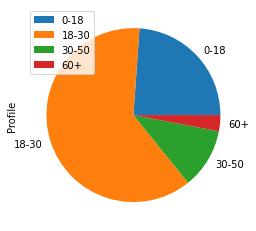

In [165]:
# another one viz with multiple conditions
df.groupby(['Age']).count().plot(y = 'Profile', kind='pie');

<br>

Remember that you can aggregate your data in any way you'd like to prepare stats for viz. Consider this one: **rights support restrictions of alcohol sales after 10 p.m.**. What we're gonna do here:  
1. First of all, let's apply groupping to our dataframe by `Profile` feature;  
2. Then, calculate number of votes in favor of/against alc. sales;  
3. Finally, make a plot of this data (horisontal bar -> `barh`)

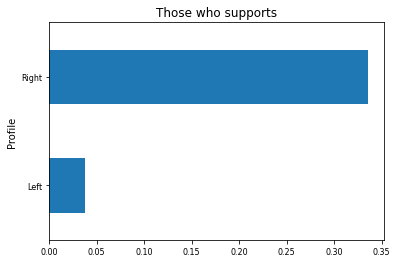

In [166]:
# pie
(df[df["Alc_past_22_prohib"]=="Yes"].groupby("Profile")["Alc_past_22_prohib"].count()/len(df)).plot(kind="barh", fontsize=8, title="Those who supports");

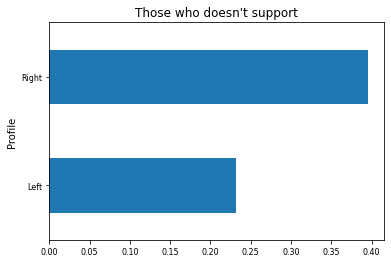

In [168]:
# pie
(df[df["Alc_past_22_prohib"]=="No"].groupby("Profile")["Alc_past_22_prohib"].count()/len(df)).plot(kind="barh", fontsize=8, title="Those who doesn't support");

***Answer***

We can see that while there is a majority of right-wingers among those who support the ban on the sale of alcohol after 22, there is an equal majority among those who are against it. This is primarily due to the imbalance in the classes: the right-wingers outnumber the left-wingers. 

However, we can still draw some conclusions: unlike on the right, where the proportions are almost unchanged, the percentage of those on the left supporting the ban on the sale of alcohol is almost six times lower than those against it.

<br>

Hypothesis could require you to use advanced visualisation tools to answer them properly. Let's now assume that **there are more left-sided electioneers in teenagers part** of population:

In [131]:
df1 = df[['Age', 'Profile']]
df1['Age'] = ['teen' if age == '0-18' else 'others' for age in df1['Age']]
df1.groupby(['Profile', 'Age']).Age.count()

C:\Users\popov\AppData\Local\Temp\ipykernel_21452\1080641937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'] = ['teen' if age == '0-18' else 'others' for age in df1['Age']]


Profile  Age   
Left     others    30
         teen       6
Right    others    72
         teen      26
Name: Age, dtype: int64

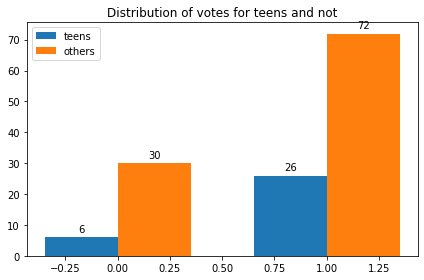

In [120]:
# stacked bar chart

import matplotlib.pyplot as plt
import numpy as np

labels = ['left', 'right']
teens = [6, 26]
others = [30, 72]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, teens, width, label='teens')
rects2 = ax.bar(x + width/2, others, width, label='others')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Distribution of votes for teens and not')
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show();

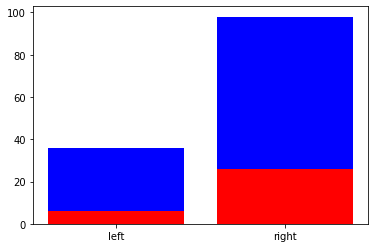

In [122]:
# plot bars in stack manner
plt.bar(labels, teens, color='r')
plt.bar(labels, others, bottom=teens, color='b')
plt.show()

***Answer:***

We see the shares are changed but not dramatically. Moreover, the share of teens even increased for right-sided voters.

***Your turn:*** 
1. Propose your hypothesis to check. The more interesting it would be, the more likely we'll get some sufficient results;  
2. Decide which kind of output you want to recieve: metrics or graphs.
3. (*) Pick suitable kind of chart for your idea;  
4. (*) Aggregate the dataframe before visualisation;  
5. Display the resulting metric/graph and approve/reject your hypothesis.

The better data approves or rejects your hypothesis, the more likely you found a valuable information about respondents.

***Answer:***



In [169]:
# print smth here!

### Data-Driven Decision-Making

Now that we have an idea of the distribution of our data, it is time to move on to a new problem. By default, we do not know the political preferences of voters, and we can only guess who they will vote for in the election. We suggest you test your logic and intuition by trying to predict voter preferences.

In [170]:
newcomers = pd.read_csv("turkey_political_opinions_test.csv")
parties = newcomers['parti'] # y's of test
newcomers = newcomers.drop(columns="parti")